In [ ]:
#Code by Grady Robbins, finished on 3/2/23

Mass of the host star (in Solar masses):  1
Semimajor axis of the orbit (in AU):  1
Eccentricity of the orbit:  0.5
omega (orbit rotation) of the orbit in degrees:  0
Mass of the planet (in Solar masses):  0.01


The period of this orbit is 365.7843325864615 days


Number of time steps to be calculated:  1000


the time it takes for this orbit to reach perihelion is 0.0 days, or  0.0 % of the full orbit


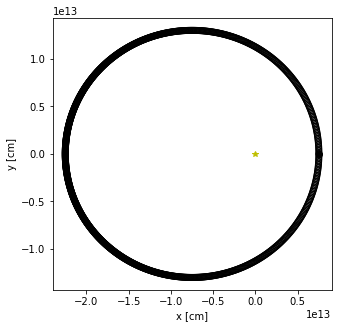

this code will break down when the eccentricity of the orbit reaches 1 (becoming a parabola)
the major axis rotated by 0.0 degrees
the black circle is the starting point of the orbit


In [3]:
                                                                                   
#Orbit computes the orbit of a small mass about a much larger mass.                                           
                                                                                            
#Adapted from:                                                                                                                                                                                                           
#"An Introduction to Modern Astrophysics", Appendix J                                                         
#Bradley W. Carroll and Dale A. Ostlie                                                                        
#Second Edition, Addison Wesley, 2007                                                                                                                                                                                                                                               
###################################################################

#Import needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
from decimal import Decimal

#Define needed constants
G = 6.67E-8                 ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
Msun = 2.E33                ##units: g
s_per_day = 60. * 60. * 24. ##units: s

#Prompt user for input variables
Mstar_solar = float(input("Mass of the host star (in Solar masses): "))
semi_maj_AU = float(input("Semimajor axis of the orbit (in AU): "))
ecc = float(input("Eccentricity of the orbit: "))
omega = float(input("omega (orbit rotation) of the orbit in degrees: "))
Mplanet = float(input("Mass of the planet (in Solar masses): "))


#TO DO: Convert input values to cgs units 
Mstar = Mstar_solar*Msun # star mass to grams
Mplanet = Mplanet*Msun #planet mass to grams
semi_maj = semi_maj_AU*cm_per_AU #semimajor axis to centimeters

omega = omega*np.pi/180 #define orbital rotation
#TO DO: Calculate the orbital period with Kepler's 3rd Law  
#P**2 = a**3 *4*pi**2 / (G*Mstar) planet mass << star mass
Planet_period_seconds = (((semi_maj**3)*(4*(np.pi**2)))/(G*Mstar))**(1/2)
Planet_period_days = Planet_period_seconds / s_per_day #convering to days
#TO DO: Output period of orbit to user and prompt for # of steps (replace placeholder period with real period)

print("The period of this orbit is " + str(Planet_period_days) + " days")
nstep = float(input("Number of time steps to be calculated: "))

#TO DO: Calculate timestep size.                                                                                     
step_size_s = Planet_period_seconds / nstep

#TO DO: Define intial values for variables to be changed with each time step.                                                    

rmin = (semi_maj*(1-ecc**2))/(1+ecc) #define rmin, rmax for reference
rmax = (semi_maj*(1-ecc**2))/(1-ecc)
theta = 2*np.pi - omega #inital rotation
r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
r0 = r
x = r*np.cos(theta)
y = r*np.sin(theta)
x0 = x
y0 = y
t = 0
Lpermass = (G*Mstar*semi_maj*(1-ecc**2))**(1/2)
x_list = [x] #creating lists to append and graph
y_list = [y]
t_list = [t]
r_list = [r]
#TO DO: Make time steps move forward (for loop or while statement)
for n in range(int(nstep)):    
    deltheta = Lpermass*step_size_s/(r**2)
    #TO DO: within the for or while loop, perform the following steps
    theta = theta + deltheta
    #Calculate distance of object from principle focus                                                        
    r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
    #Calculate cartesian coordinates and save to array                                                        
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #Update time                                                                                                                                                                   
    t = t + step_size_s
    #Calculate angular momentum per unit mass.   (doesn't change)                                                             
    #Calculate next theta value based on ang. momentum per unit mass.
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    r_list.append(r)

#TO DO: Plot orbital path.  

#These are placeholder X and Y arrays-- yours will contain the X and Y positions of the planet
x_arr = np.array(x_list)
y_arr = np.array(y_list) #converting to arrays for math
t_arr = np.array(t_list)
r_arr = np.array(r_list)
rmin = min(r_list)

for n in range(len(r_list)):
    if rmin == r_list[n]:
        T_peri_eff = t_list[n] #calculating time of perihelion
        
dxdt = ((x_arr[0:-1] - x_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
dydt = ((y_arr[0:-1] - y_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
speed = ((dxdt**2 + dydt**2)**(.5)) 
Kinetic_E = .5*Mplanet*(speed**2)
Potential_E = -G*Mplanet*Mstar/r_arr

T_peri_real = (T_peri_eff) / s_per_day
t_list_day = t_arr / s_per_day/ 365
print('the time it takes for this orbit to reach perihelion is',T_peri_real,'days, or ',str(T_peri_real*100/Planet_period_days),'% of the full orbit')
#fig = plt.figure(figsize=(5,5))
plt.scatter(x_arr, y_arr, facecolors = 'none', edgecolors = 'black')    #Orbital path                                            
plt.plot(0, 0, 'y*')    #Stellar host
plt.plot(x0, y0, 'ko') #stating point
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

plt.show()
print('this code will break down when the eccentricity of the orbit reaches 1 (becoming a parabola)')
print('the major axis rotated by ' +str(omega*180/np.pi)+' degrees')
print('the black circle is the starting point of the orbit')

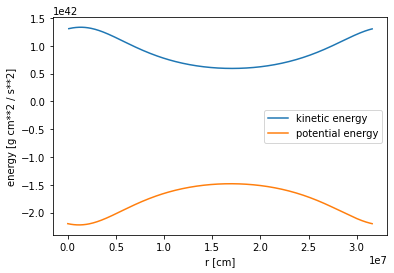

In [3]:
plt.plot(t_list[1:], Kinetic_E, label = 'kinetic energy')    #kinetic energy over time
plt.plot(t_list, Potential_E, label = 'potential energy')    #potential energy over time                                            
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('energy [g cm**2 / s**2]')
plt.show() 

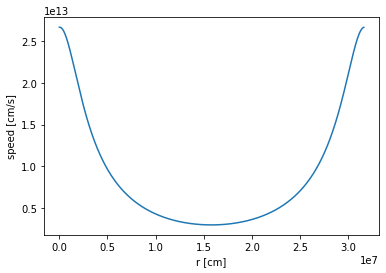

In [4]:
plt.plot(t_list[1:], speed**2)
plt.xlabel('r [cm]')
plt.ylabel('speed [cm/s]')
plt.show()  #speed over time      

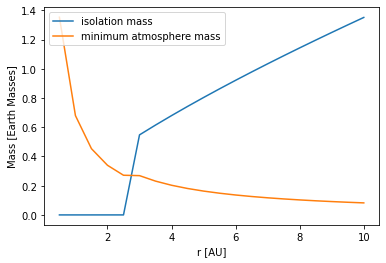

this plot shows that planets within 1 AU of the sun must have a mass greater than ~0.6 Earth Masses to accrete an atmosphere, while planets further than 3 AU only have to be ~0.3 Earth masses to accrete an atmosphere. However, planets within 3 AU tend to be less than 0.3 Earth masses, meaning these planets likely will not form atmospheres. Planets past 3 AU tend to have masses greater than 0.3 Earth Masses, meaning these planets will likely have atmospheres.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 4) r in AU
#Mstar_solar = float(input("Mass of the host star (in Solar masses): "))
Mstar_solar =1
Mstar_Earth = Mstar_solar *333030 #converting to earth masses

def sigmap(r): # in g/cm^2
    if r<3:
        return ((1.73e3)*((r)**(-3/2)))/100
    if r>=3:
        return ((1.73e3)*((r)**(-3/2)))*4
isomass_list = []
r_list=[]
sigma_list = []
Menv_list = []
for r in range(1,21):
    r_AU = r*0.5 #counting in 0.5 AU
    r_cm = r_AU /6.68459e-14 # to cm
    r_list.append(r_AU)
    sigmaplanet = sigmap(r_AU)*1.67443e-28 / ((6.68459e-14)**2) #converting to Earth Mass / AU^2
    isomass = 166*(Mstar_Earth**(-1/2))*(sigmaplanet**(3/2))*(r_AU**3)/5000
    isomass_list.append(isomass)
    sigma_list.append(sigmaplanet)
    if r_AU<3:
        pm = 3 #g/cm^3
    if r_AU>=3:
        pm = 1 #g/cm^3
    Tdisk = ((6e9)*(r_AU**(-3)))**(1/4)
    Menv = (1.6e-6)*(pm**(-1/2))*(Tdisk**(3/2))*(np.log(2*pm*r_cm/sigmap(r_AU)))**(3/2) # in earth masses
    Menv_list.append(Menv)
    
    
plt.plot(r_list,isomass_list, label = 'isolation mass')
#plt.plot(r_list,sigma_list)
plt.plot(r_list,Menv_list, label = 'minimum atmosphere mass')
plt.xlabel('r [AU]')
plt.ylabel('Mass [Earth Masses]')
plt.legend(loc="upper left")
plt.show()

print('this plot shows that planets within 1 AU of the sun must have a mass greater than ~0.6 Earth Masses to accrete an atmosphere, while planets further than 3 AU only have to be ~0.3 Earth masses to accrete an atmosphere. However, planets within 3 AU tend to be less than 0.3 Earth masses, meaning these planets likely will not form atmospheres. Planets past 3 AU tend to have masses greater than 0.3 Earth Masses, meaning these planets will likely have atmospheres.')

In [39]:
#Homework 3, problem 1
Rstarsolar = float(input("Radius of the Sun (in Solar radii): "))
Rstar_cm = Rstarsolar *69.634e9
#transit time = 2Rstar / planetvelocity
T_transit = 2*Rstar_cm/speed[0]
k = -1
tabovepoint = []
tbelowpoint = []
for n in range(len(x_arr)):
    if x_arr[n]>=0:
        if y_arr[n]>= 0:
            if abs(y_arr[n]) <= Rstar_cm:
                tabovepoint.append(t_arr[n])
        if y_arr[n] <0:
            if abs(y_arr[n]) <= Rstar_cm:
                tbelowpoint.append(t_arr[n])
tabovepoint = np.array(tabovepoint)
tbelowpoint = np.array(tbelowpoint)[1:]

print('predicted transit time in hr:',T_transit/3600)
print('calculated transit time in hr',2*(max(tabovepoint) -min(tbelowpoint))/3600)
transit_sara=(2*Rstar_cm*Planet_period_seconds*(4*np.pi**2)**(1/3))/(2*np.pi*(Planet_period_seconds)**(2/3)*(Mstar)**(1/3)*(G)**(1/3))
print('transit time from text in hr:',transit_sara/3600)
print('all of these times are very close to each other, differing in only 0.1 hours')


Radius of the Sun (in Solar radii):  1


predicted transit time in hr: 12.972287152623768
calculated transit time in hr 12.875608507059514
transit time from text in hr: 12.972287128935477
all of these times are very close to each other, differing in only 0.1 hours
